In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import os

In [2]:
df=pd.read_csv("melb_data.csv")

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
#This Dataset includes the information regarding real estate business. 
#The price paid by the clients depending on various parameters is defined in each row. 
#Here target variable: finding reasonable price,which depends on all other criterias
#Rooms, Method, SellerG (The Agents),Date, Regionname, Propertycount, bathroom, bedroom, Car, Landsize,CouncilArea, etc are all the independent variables. 

In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
df.head()  

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [8]:
df.shape  #13580 rows and 21 columns

(13580, 21)

In [9]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [11]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [12]:
df.isnull().sum() #Car has 62 null values, Building Area has 6450, Yearbuilt has 5375 and CouncilArea has 1369 null values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [13]:
df.head() 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [14]:
#how many categories are there for each independent variable?
df.Suburb.unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [15]:
df.Address.unique()

array(['85 Turner St', '25 Bloomburg St', '5 Charles St', ...,
       '83 Power St', '96 Verdon St', '6 Agnes St'], dtype=object)

In [16]:
df.Rooms.unique()

array([ 2,  3,  4,  1,  6,  5,  8,  7, 10], dtype=int64)

In [17]:
df.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [18]:
df.Method.unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [19]:
df.SellerG.unique()

array(['Biggin', 'Nelson', 'Jellis', 'Greg', 'LITTLE', 'Collins', 'Kay',
       'Beller', 'Marshall', 'Brad', 'Maddison', 'Barry', 'Considine',
       'Rendina', 'Propertyau', 'McDonald', 'Prof.', 'Harcourts',
       'hockingstuart', 'Thomson', 'Buxton', 'RT', "Sotheby's", 'Cayzer',
       'Chisholm', 'Brace', 'Miles', 'McGrath', 'Love', 'Barlow',
       'Sweeney', 'Village', 'Jas', 'Gunn&Co', 'Burnham', 'Williams',
       'Compton', 'FN', 'Raine&Horne', 'Hunter', 'Noel', 'Hodges', 'Ray',
       'Gary', 'Fletchers', 'Woodards', 'Raine', 'Walshe', 'Alexkarbon',
       'Weda', 'Frank', 'Stockdale', 'Tim', 'Purplebricks', 'Moonee',
       'HAR', 'Edward', 'Philip', 'RW', 'North', 'Ascend', 'Christopher',
       'Mandy', 'R&H', 'Fletchers/One', 'Assisi', 'One', "O'Brien", 'C21',
       'Bayside', 'Paul', 'First', 'Matthew', 'Anderson', 'Nick',
       'Lindellas', 'Allens', 'Bells', 'Trimson', 'Douglas', 'YPA', 'GL',
       "Tiernan's", 'J', 'Harrington', 'Dingle', 'Chambers', 'Peter',
    

In [20]:
df.Bedroom2.unique()

array([ 2.,  3.,  4.,  1.,  6.,  5.,  0.,  8.,  9.,  7., 20., 10.])

In [21]:
df.Distance.unique()

array([ 2.5, 13.5,  3.3,  6.4, 13.8, 11.1,  6.3,  5.9, 11. , 12.2, 10.5,
        6.6,  9.7,  9.2, 13. , 13.9, 13.1, 10.8, 11.2, 10.7,  5.2, 11.8,
       11.7,  7.8,  9. ,  3.2, 11.4,  8.9,  8.1,  9.3, 13.6,  3.4,  1.6,
       10.3,  8.5,  7.7,  8. ,  9.4,  5.8,  3.5,  4.4, 12.1, 13.7, 14.5,
        4.6,  7.9, 15. , 12.8,  4.2,  5.6,  7.5,  6.2,  7.4,  8.7,  2.8,
        4.1,  6.9, 14.6,  8.4,  2.3,  5.5, 11.5, 14.7,  2.6,  9.9,  3.8,
        4.5,  8.8,  2.1,  1.2,  6.1, 12.6, 13.3,  6.5, 14.9,  1.9,  5.1,
        7. ,  9.1,  9.5,  1.8,  1.5,  9.8, 12.4, 10.6,  8.2, 10.9, 10.4,
       14. , 12.5,  5.3, 12.7,  3.7,  3. ,  5.7, 10.2, 23.2, 17.3, 35.2,
       25. , 16.1,  4. , 14.8, 17.9,  3.6,  6.7, 20.6, 34.7, 23. , 24.7,
       21.8, 22.2, 14.3, 25.9, 18. , 19.6, 15.4, 38. , 36.9, 45.9, 12.9,
        7.3, 32.3, 45.2, 16. , 12.3, 15.5,  5.4, 25.2, 16.3,  4.3, 31.7,
       17.2, 16.2, 21.5, 14.2, 34.1, 12. ,  2.4, 21.3, 23.8, 23.5, 15.2,
       35.4, 20.5,  2.7, 20.8,  5. , 18.4, 27. , 15

In [22]:
df.Bathroom.unique()

array([1., 2., 3., 4., 0., 7., 5., 6., 8.])

In [23]:
df.Car.unique()

array([ 1.,  0.,  2.,  6.,  5.,  4.,  3.,  8.,  7.,  9., 10., nan])

In [24]:
df.CouncilArea.unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [25]:
df.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [26]:
df.Method.value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

<AxesSubplot:xlabel='Method', ylabel='count'>

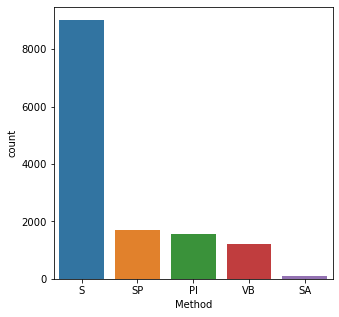

In [27]:
#For graphical representation
plt.figure(figsize=(5,5))
sns.countplot(x='Method', data=df)
#Result: S Method having highest no of counts.

<AxesSubplot:xlabel='Type', ylabel='Rooms'>

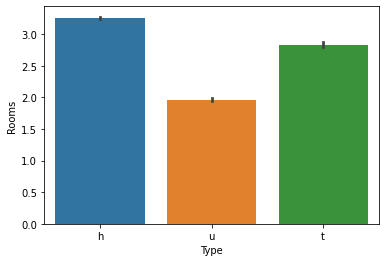

In [28]:
#Which Type has the highest mean demand of Rooms and how many Rooms customer Preferred the most?
sns.barplot(x='Type',y='Rooms',data=df)
#Result: Type h and most of the people prefer approx 3 rooms 

<AxesSubplot:xlabel='Method', ylabel='Rooms'>

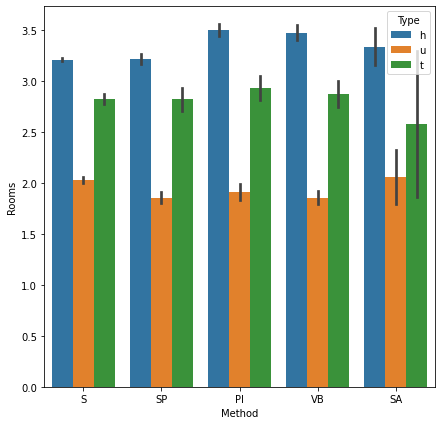

In [29]:
#Which method of selling resulted in increased sale of Rooms with respect to each Type?
plt.figure(figsize=(7,7))
sns.barplot(x='Method',y='Rooms',hue='Type',estimator=np.mean,data=df)
#Result: PI Method increased the sale of Rooms,and clients preffered Type h the most.

In [30]:
#What is the count for demand of Each Room sets?
df.Rooms.value_counts()
#Result: Room 3 captures the highest demand while Room 10 has the least demand.

3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64

<AxesSubplot:xlabel='Car', ylabel='count'>

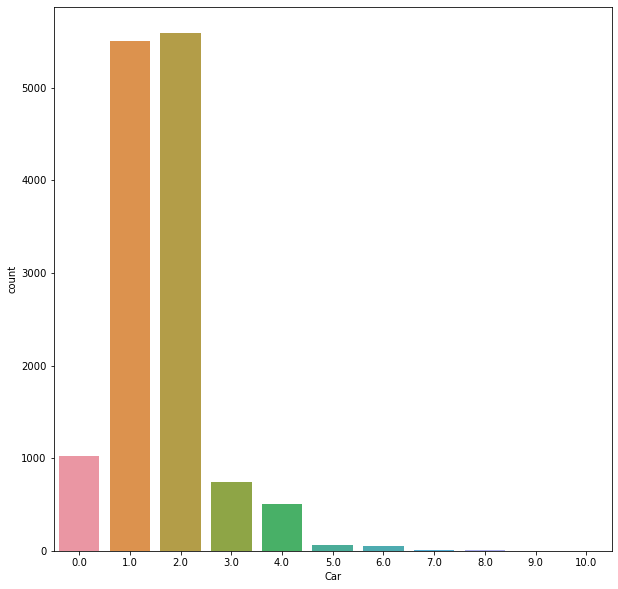

In [31]:
#What is the no of Cars that maximum clients own?
plt.figure(figsize=(10,10))
sns.countplot(x='Car', data=df)
#Result: Most of the clients have 1 or 2 Cars

<Figure size 360x360 with 0 Axes>

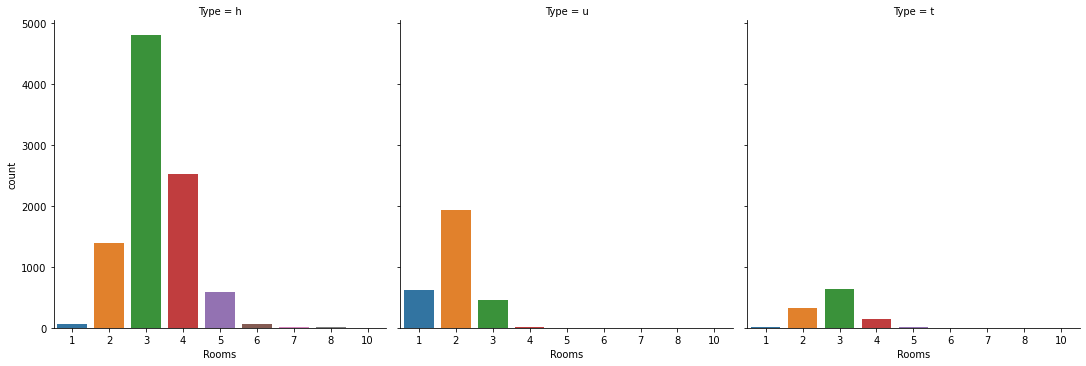

In [32]:
#No of Rooms having maximum demand under each Type
plt.figure(figsize=(5,5))
sns.catplot(x='Rooms',col='Type',kind='count', data=df)
#Result: 
#For Type h= 3 Rooms
#For Type u= 2 Rooms
#For Type t= 3 Rooms

<Figure size 504x504 with 0 Axes>

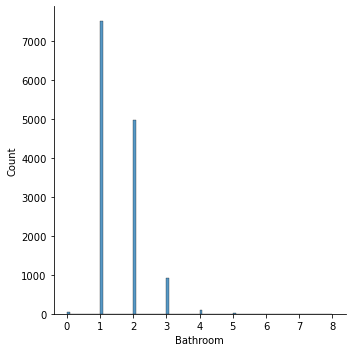

In [33]:
#No of bathrooms customers preffered the most?
plt.figure(figsize=(7,7))
sns.displot(df['Bathroom'])
Result:1

<AxesSubplot:xlabel='Type', ylabel='Distance'>

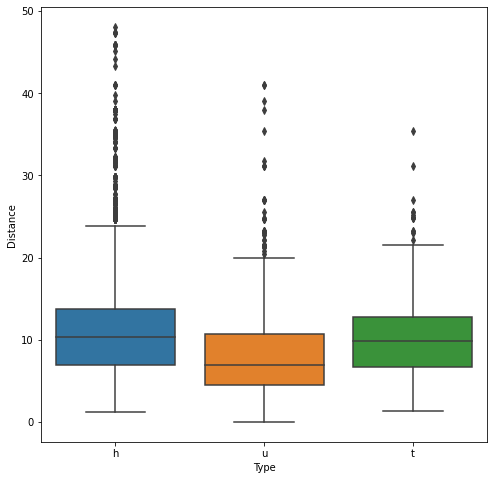

In [34]:
#How much distance client find suitable with respect to each Type?
plt.figure(figsize=(8,8))
sns.boxplot(x='Type',y='Distance',data=df)
#Result:
#For Type h, Clients preffered median distance of approx 10
#For Type u, Clients preffered median distance of approx 7
#For Type t, Clients preffered median distance of 10

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

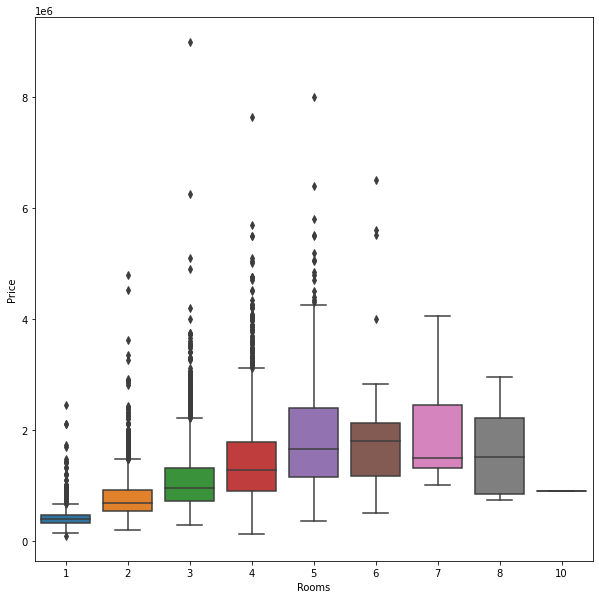

In [35]:
#For how many no of rooms, clients paid the maximum and minimum price?
plt.figure(figsize=(10,10))
sns.boxplot(x='Rooms',y='Price',data=df)
#Result: Highest median price paid by clients is for 6 rooms and lowest median price is for Room 1.

<AxesSubplot:xlabel='Type', ylabel='Price'>

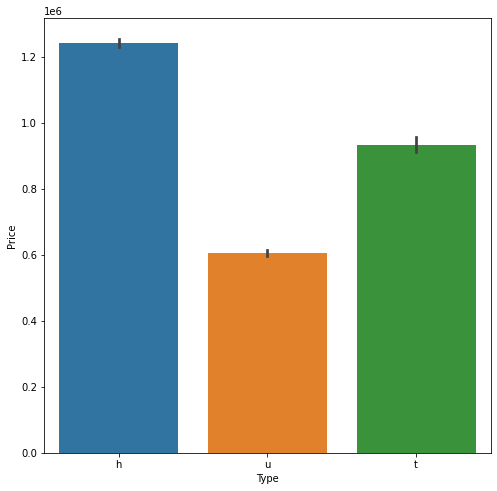

In [36]:
# Opting for which Type resulted in highest price?
plt.figure(figsize=(8,8))
sns.barplot(x='Type',y='Price',data=df)
#Result: Mean price of Type h is the highest.

<AxesSubplot:xlabel='Method', ylabel='Price'>

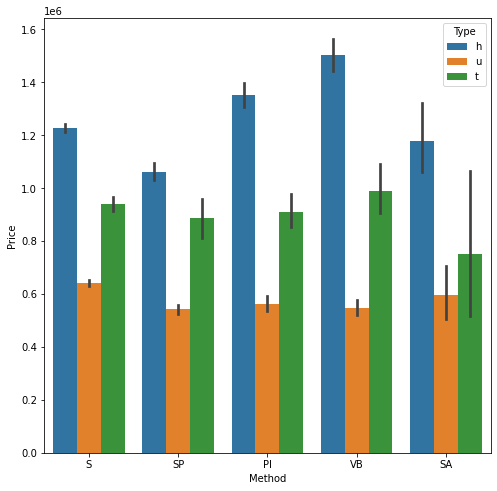

In [37]:
#Which method with respect to each Type resulted in highest Prices?
plt.figure(figsize=(8,8))
sns.barplot(x='Method',y='Price',data=df,hue='Type')
#Result: Customers paid Highest mean price under Type h using Method VB

<AxesSubplot:xlabel='Regionname', ylabel='Propertycount'>

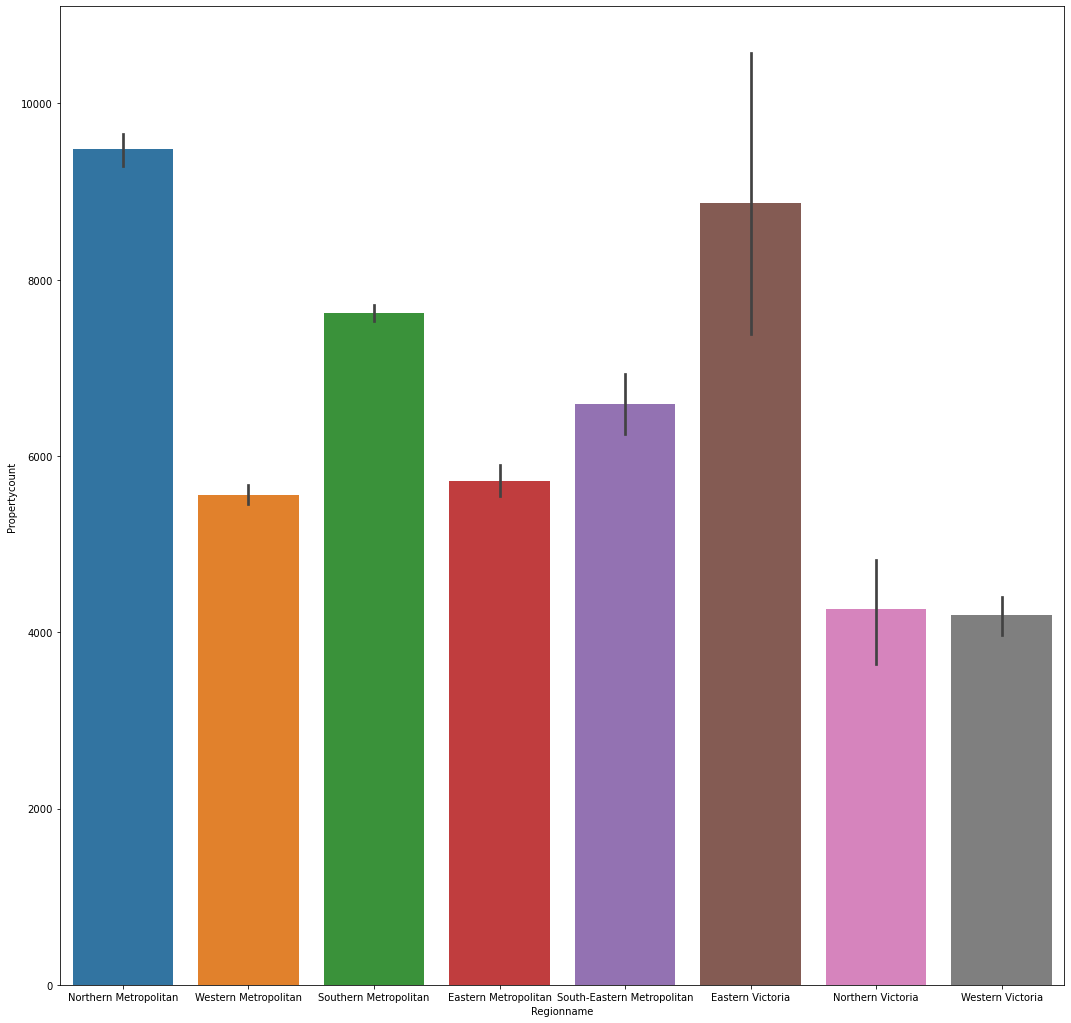

In [38]:
#Which Region has the highest no of Properties?
plt.figure(figsize=(18,18))
sns.barplot(x='Regionname',y='Propertycount',data=df)
#Result: Northern Metropolitan region has the highest Propertycount.

<Figure size 1080x1080 with 0 Axes>

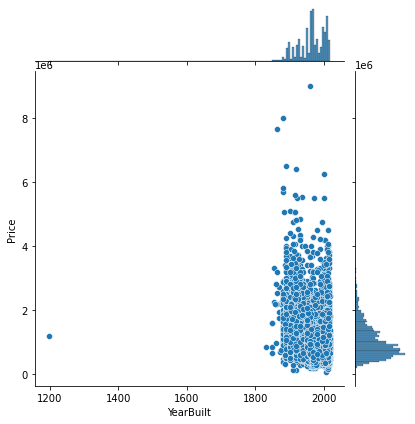

In [39]:
#What is the range of Pricing for year 1900-2000?
plt.figure(figsize=(15,15))
sns.jointplot(y=df["Price"],x=df["YearBuilt"],kind='scatter')
#Result: The price charged in the Yearbuilt 1900-2000 range between 0-4.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

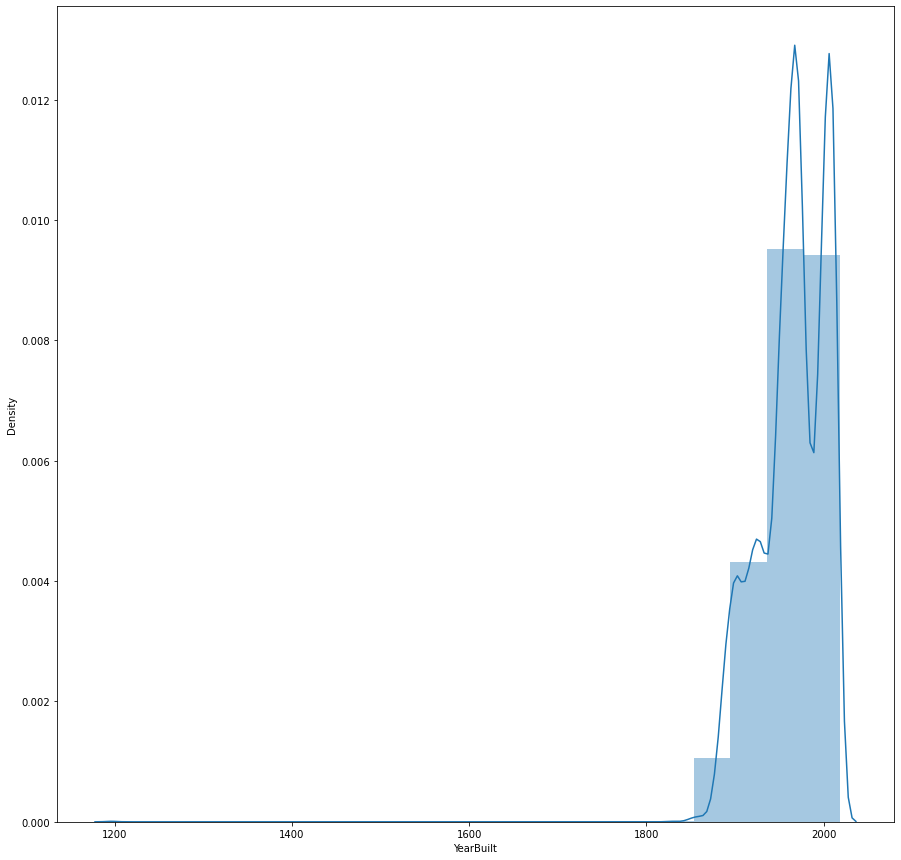

In [40]:
#In which year the demand was maximum?
plt.figure(figsize=(15,15))
sns.distplot(df['YearBuilt'],kde=True,bins=20)
#The Yearbuilt 1900-2000 shows the highest density

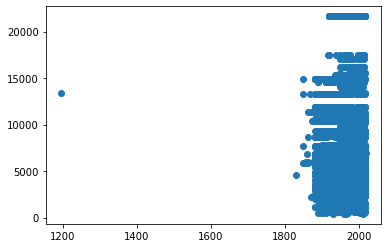

In [41]:
#From which year, the Properties count reached maximum?
plt.scatter(x='YearBuilt',y='Propertycount',data=df)
plt.show()
#Result: After 1950, the property count reached to 20000  
#maximum density for property count was between 5000-10000

<Figure size 360x360 with 0 Axes>

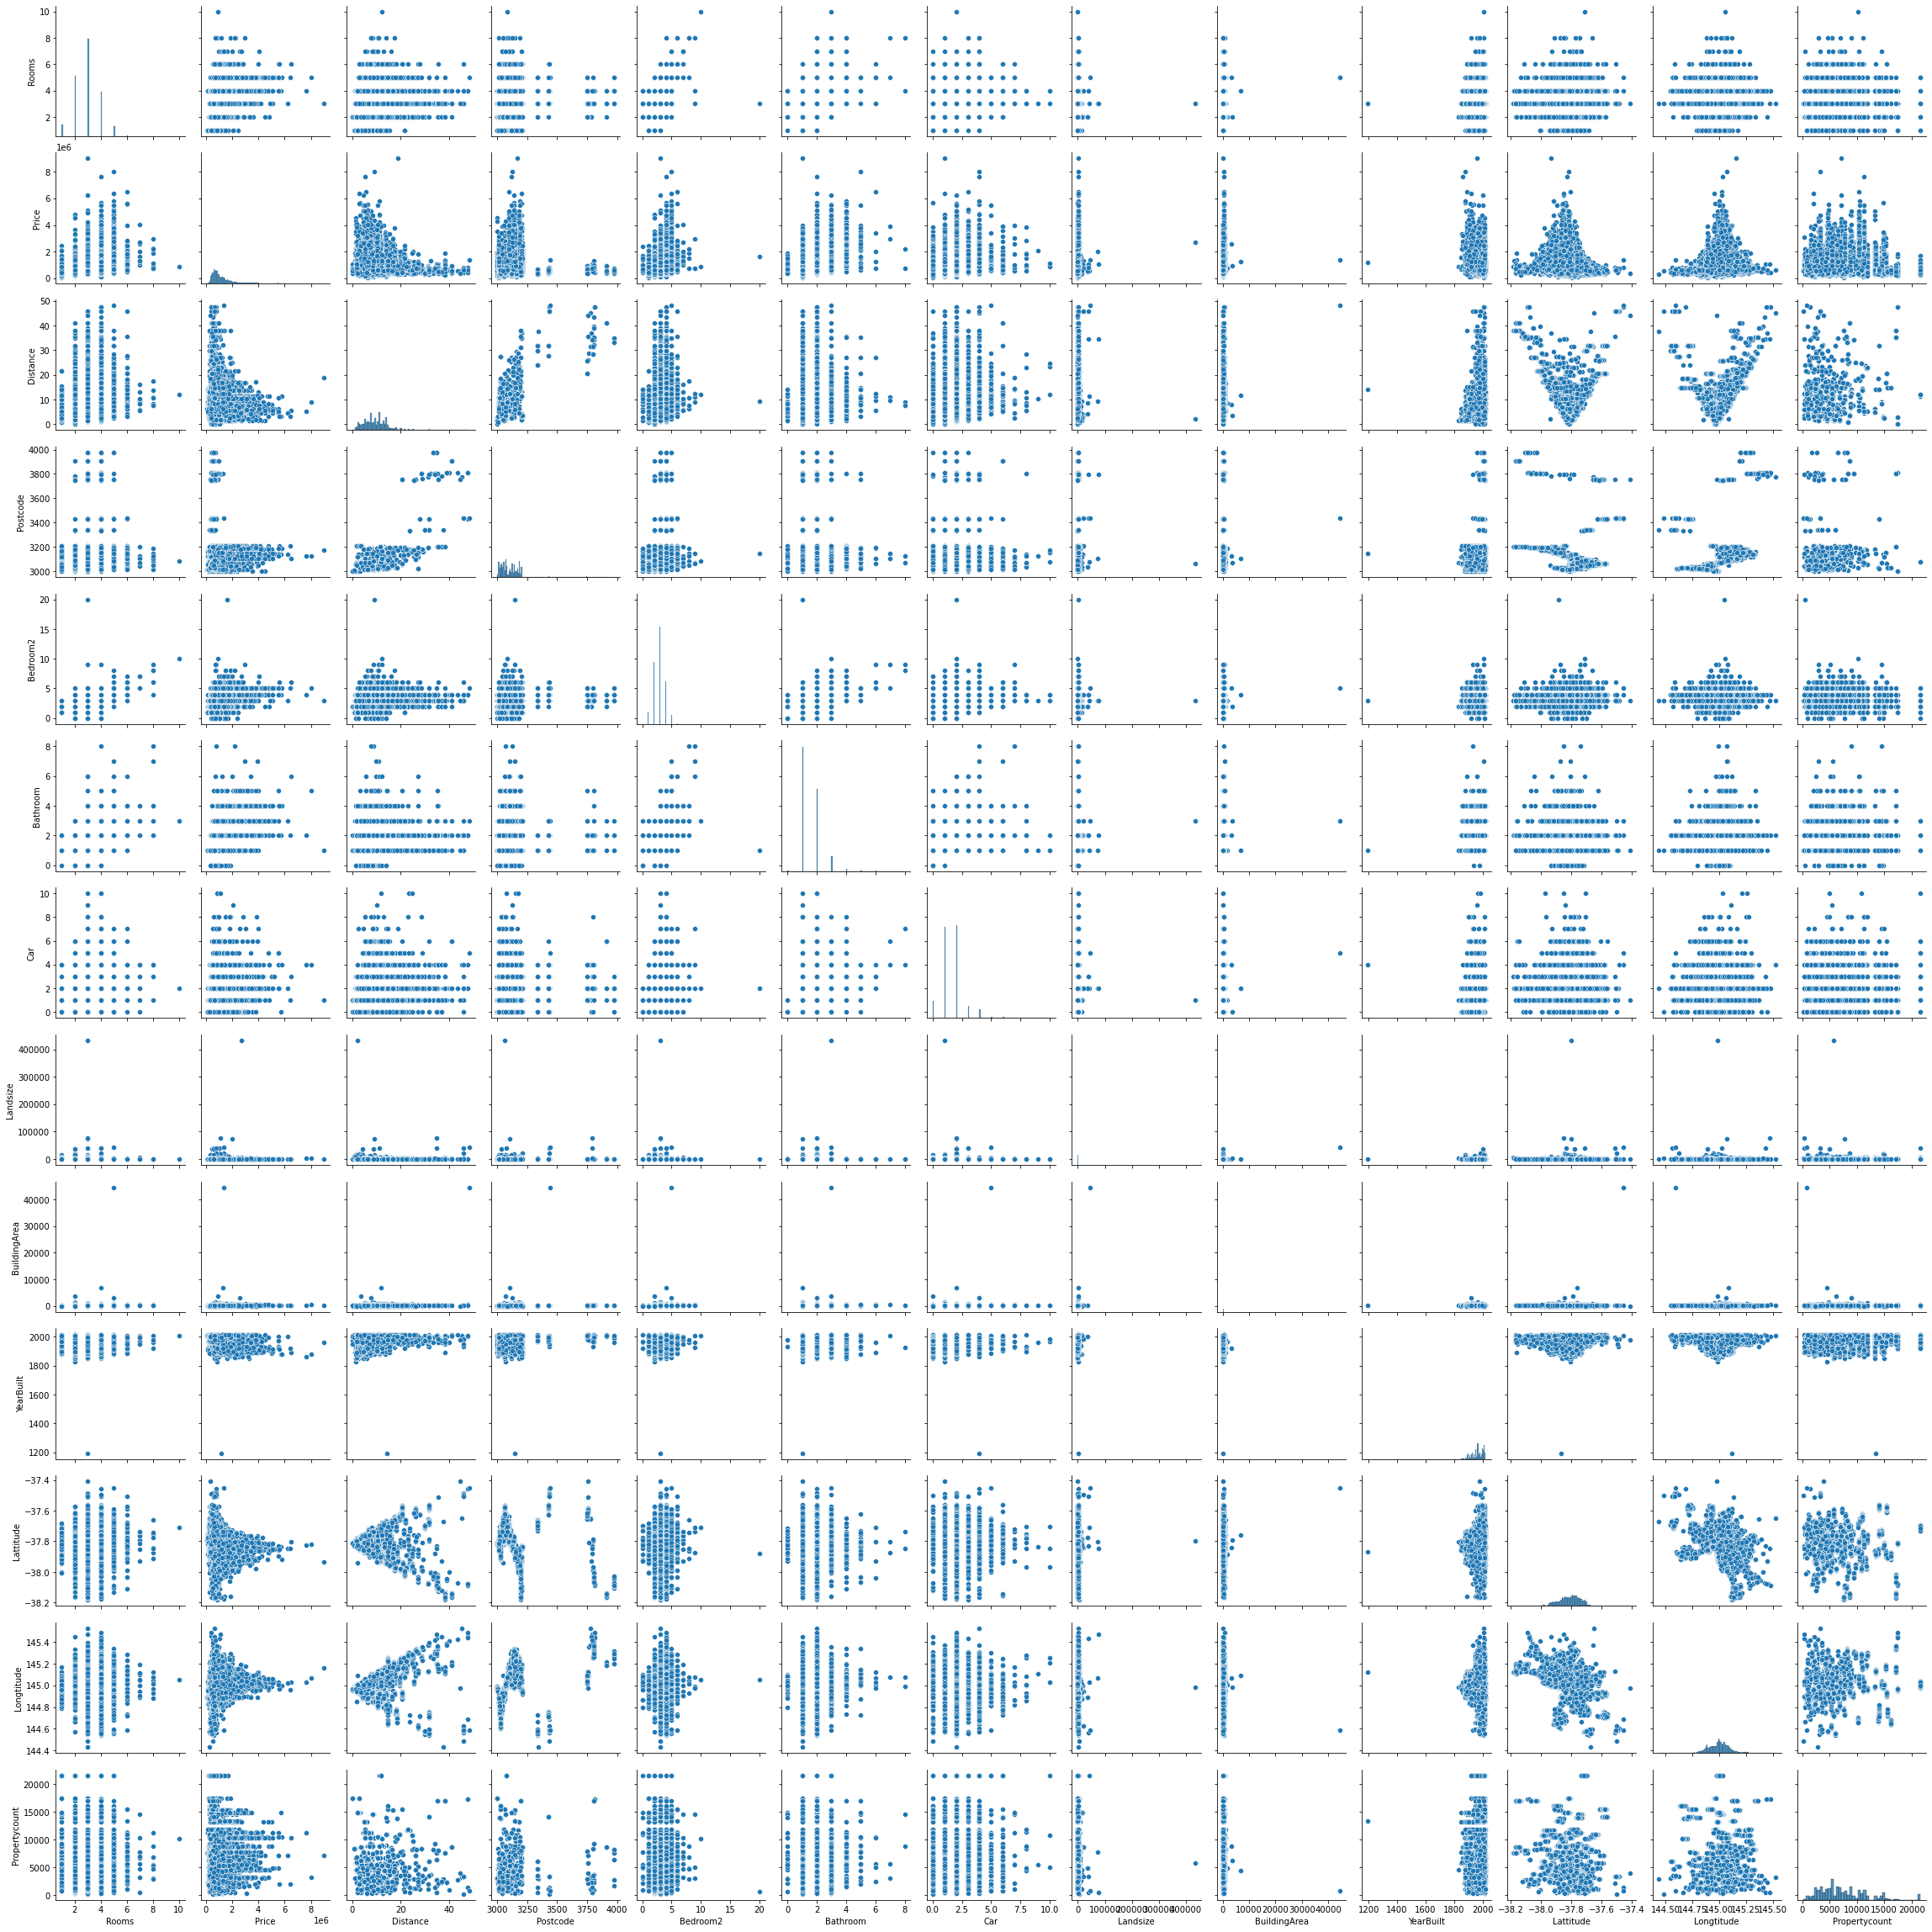

In [42]:
plt.figure(figsize=(5,5))
sns.pairplot(df)

<AxesSubplot:xlabel='Method', ylabel='Rooms'>

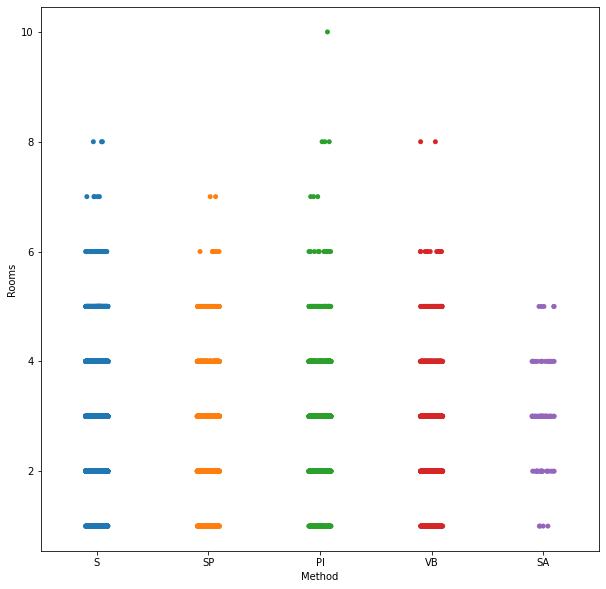

In [43]:
#Find situable Method for choosing no of Rooms?
plt.figure(figsize=(10,10))
sns.stripplot(x='Method',y='Rooms',data=df,jitter=True)
#Result: Method PI was applied for purchasing any no of rooms.

<Figure size 7200x4320 with 0 Axes>

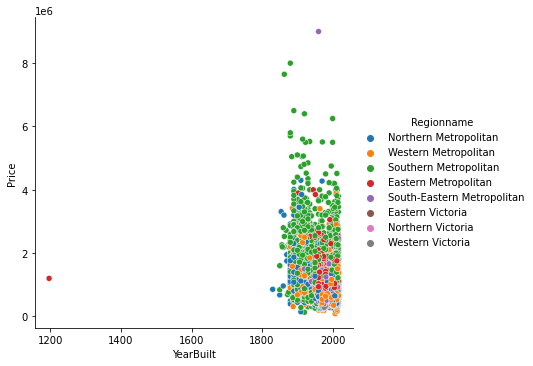

In [44]:
#Which Region was in much demand for year 1900-2000 and customers purchased properties at what price?
plt.figure(figsize=(100,60))
sns.relplot(x='YearBuilt',y='Price',hue='Regionname',kind='scatter',cmap='winter',data=df)
#Year 1900-2000 depicted that clients buy properties in Southern Metropolitan Region at the Price range of 0-4

In [45]:
data=df.select_dtypes(include=['float64','int64'])

In [46]:
data

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [47]:
data.dtypes

Rooms              int64
Price            float64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
Propertycount    float64
dtype: object

<AxesSubplot:>

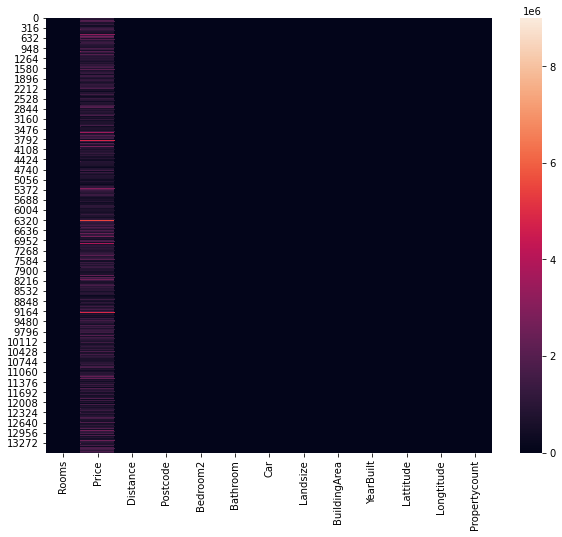

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(data)

<AxesSubplot:xlabel='Method', ylabel='Type'>

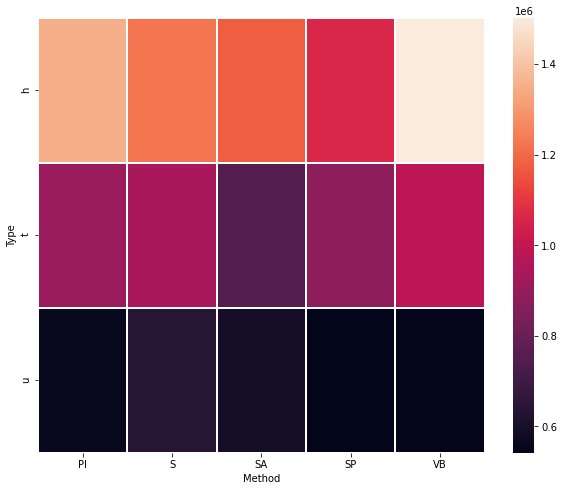

In [49]:
#Which Method along with Type resulted in highest and lowest prices?
plt.figure(figsize=(10,8))
df1=df.pivot_table(index='Type',columns='Method',values='Price')
sns.heatmap(df1,linewidth=1)
#Result: Method VB with Type h has the highest price
#Method PI, SP AND VB under Type u resulted in lowest prices

<AxesSubplot:xlabel='Method', ylabel='Regionname'>

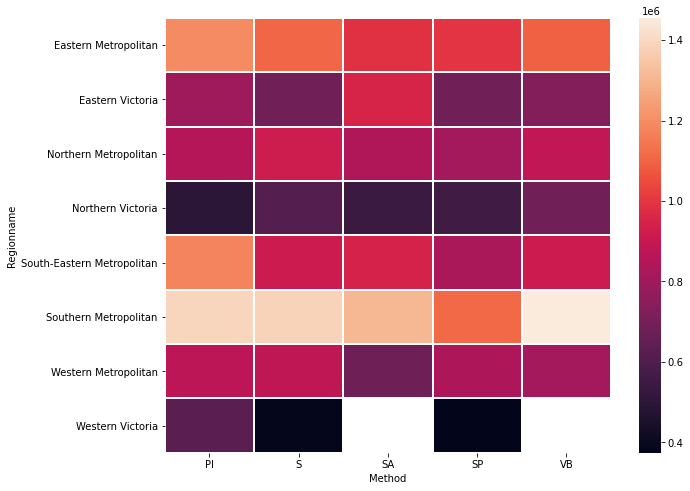

In [50]:
#Which region has the cheapest rate of Properties and what method clients adopted for that?
plt.figure(figsize=(10,8))
df1=df.pivot_table(index='Regionname',columns='Method',values='Price')
sns.heatmap(df1,linewidth=1)
#In Western Victoria,adopting Method S and SP lead to lowest price to be paid by customers

<AxesSubplot:xlabel='Method', ylabel='CouncilArea'>

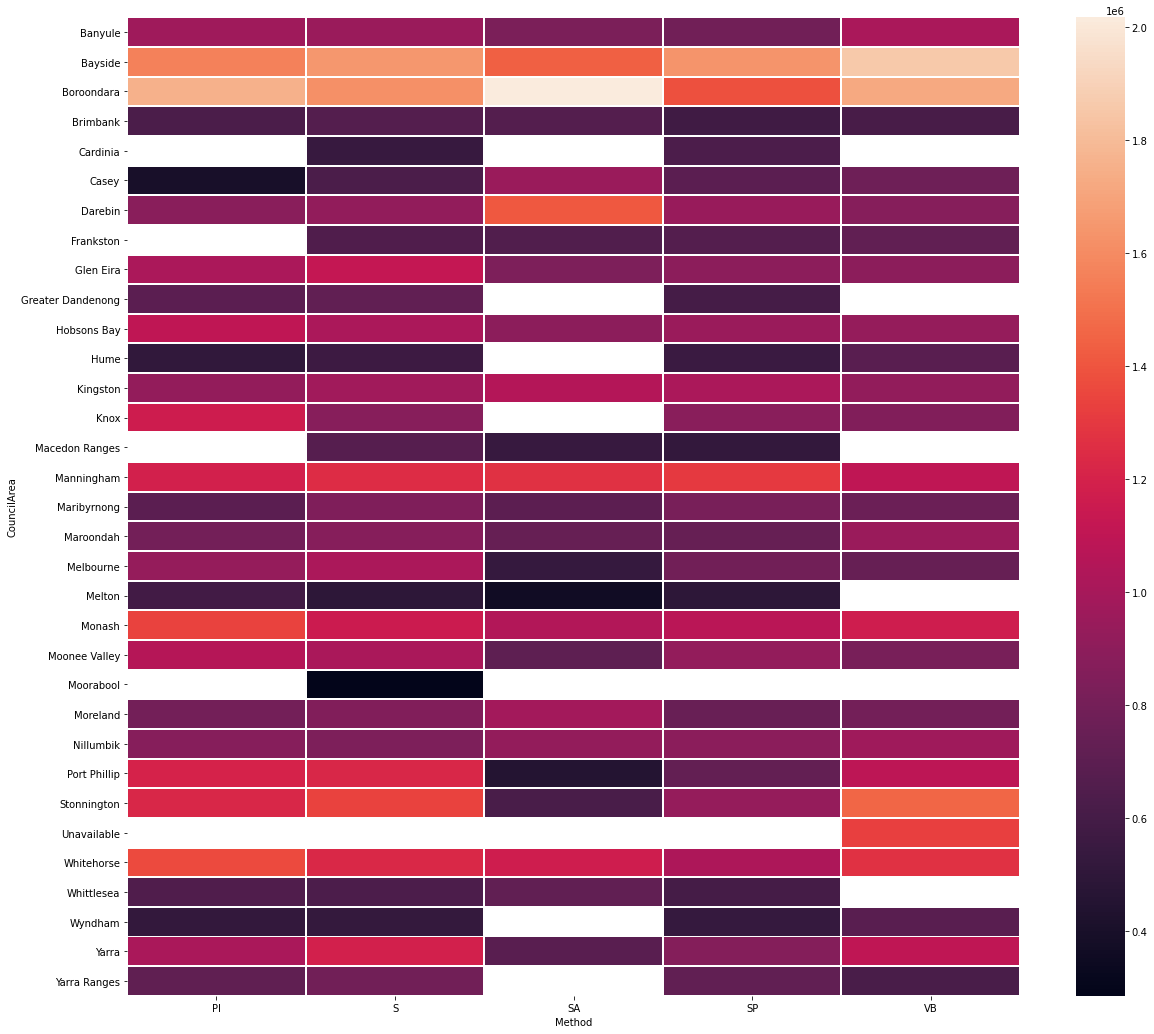

In [51]:
#Comment on the price changes as per Council Area and the method adopted?
plt.figure(figsize=(20,18))
df1=df.pivot_table(index='CouncilArea',columns='Method',values='Price')
sns.heatmap(df1,linewidth=1)
#At Council Areas Casey, Melton, Moorabool using methods PI,SA and S respectively provided property at lowest price